# Exploration02_Price Prediction of Airbnb, New York City 
###### 온라인 코어 2기 박수경

머신러닝의 선형 회귀 모델을 이용해서 뉴욕의 Airbnb가격을 예측해 봅니다.  
데이터셋 : https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data  
평가지표 : MSE(Mean squared Error)사용

## 1. 라이브러리와 데이터 불러오기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# 데이터 불러오기
train = pd.read_csv('~/aiffel/Exploration/E02/data/train.csv')
test = pd.read_csv('~/aiffel/Exploration/E02/data/test.csv')

## 2. 탐색적 데이터 분석 (EDA)

우리가 어떤 데이터를 바탕으로 예측하거나 결과를 낼 때, 항상 바탕이 되는 데이터를 잘 살펴보아야 합니다.  
데이터를 불러오면 항상 그 데이터의 정보를 파악합니다.  
크기, 데이터의 구성(info)를 먼저 확인하고 head()로 몇개의 row를 확인합니다.  
수치형의 피처가 있으면 시각화를 통해 특이한 점을 찾아 볼 수 있으며
오브젝트형이라면 unique, nunique등으로 요소들의 개수나 특징을 살펴볼 수 있습니다. 

In [2]:
# 데이터 크기
print(type(train))
print(train.shape)
print(type(test))
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
(39116, 16)
<class 'pandas.core.frame.DataFrame'>
(9779, 15)


In [3]:
# 데이터 타입
train.info()
print('=======================================================')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

이번 프로젝트에서는 회귀 모델을 이용, train이라는 학습용 데이터로 학습한 뒤  
test 데이터의 price를 타겟으로 해 예측해 봅니다.


In [4]:
# 데이터 샘플 확인
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


데이터의 결측치를 조사해 봅니다.

In [5]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [6]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

train 과 test 데이터 모두 host_id, host_name, last_review, reviews_per_month 에서 결측치를 확인할 수 있습니다.  
name과 host_name의 결측치를 가지는 행은 그 비중이 데이터에서 매우 적습니다. 그리고 id와 host_id 열에 결측값이 없기 때문에, 이름값이 없어도 분석이 가능합니다. 따라서 두 피처는 삭제해도 무방하다고 판단했습니다.  
last_review, reviews_per_month는 결측된 비율이 무시할 수 없다고 판단해, 어떻게 메꿔야 할지 결정하기 위해 describe로 들여다 봅니다.


In [7]:
train['last_review'].describe()
print("=======================================")
# train['last_review'].head()
train['last_review'].unique()  

array(['2019-01-01', '2019-06-30', '2019-02-07', ..., '2017-01-28',
       '2013-05-31', '2013-12-25'], dtype=object)

count    31122.000000
mean         1.372444
std          1.683963
min          0.010000
25%          0.190000
50%          0.710000
75%          2.010000
max         58.500000
Name: reviews_per_month, dtype: float64


<AxesSubplot:>

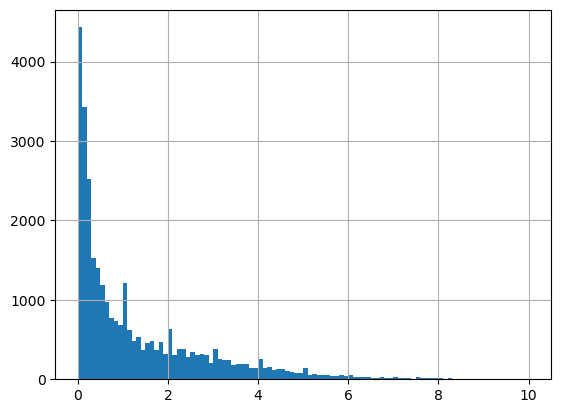

In [8]:
print(train['reviews_per_month'].describe())
print("=======================================")
# train['reviews_per_month'].head()
train['reviews_per_month'].hist(bins=100, range=[0, 10]) #대체로 0~10 사이의 값. 많은 값들이 0쪽에 몰려 있다.


학습 데이터의 'price'를 살펴봅니다.  


In [9]:
print(train['price'].describe())

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


분포의 99% 신뢰구간은 $μ ± 3σ$ 으로 조금 더 가격의 분포 형태를 자세히 보기로 합니다.

<AxesSubplot:>

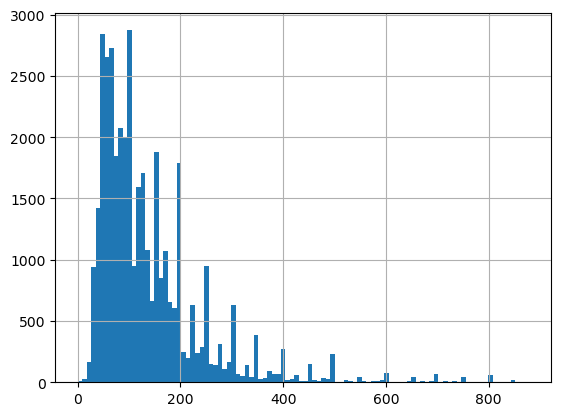

In [10]:
m = train['price'].mean()
s = train['price'].std()
train['price'].hist(bins=100, range=[0, m+3*s])

가격의 평균은 152달러, 대체로 200 달러 내에 많은 값들이 몰려 있는 것이 보입니다. 
그래프에서 일정 구간 내에 많이 값이 몰려 있다면 로그함수를 씌웁니다

<AxesSubplot:>

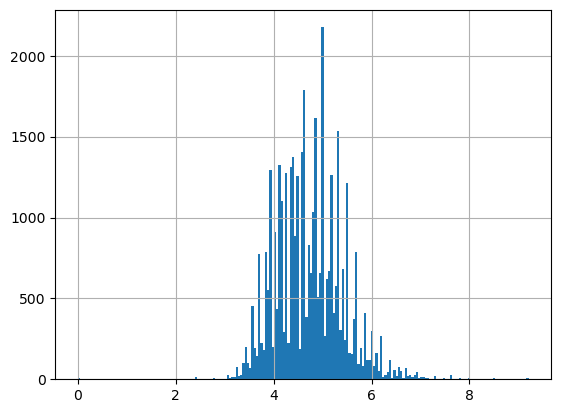

In [11]:
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=200)

In [12]:
# 가격 피처 복사
target = train['price']
train = train.drop('price', axis=1)

target에 가격 피처를 복사해두고 train에서 삭제합니다. 이 때 target의 값은 로그가 씌워져 있다는 것을 잊지 말하야 합니다.

In [13]:
print(train['id'].nunique())
print(test['id'].nunique())

39116
9779


중복으로 리스팅된 곳은 없어 보입니다. 리스팅된 곳의 호스트를 살펴봅니다.

In [14]:
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

데이터의 오브젝트타입의 열들도 살펴봅니다.

In [15]:
train_obj = train[['neighbourhood_group', 'neighbourhood','room_type']]
print(train_obj['neighbourhood_group'].nunique())
print(train_obj['neighbourhood'].nunique())
print(train_obj['room_type'].nunique())
print('===============================================================')
test_obj = test[['neighbourhood_group', 'neighbourhood','room_type']]
print(test_obj['neighbourhood_group'].nunique())
print(test_obj['neighbourhood'].nunique())
print(test_obj['room_type'].nunique())


5
221
3
5
192
3


neighbourhood_group, room_type 컬럼은 원-핫 인코딩 방법으로 인코딩 가능하지만,  
neighbourhood 컬럼은 레이블의 길이가 좀 긴 것 같습니다. 예측에 활용하려면 레이블 인코딩을 해야겠습니다.

## 3. 데이터 전처리

EDA를 통해 필요하다고 생각되는 전처리를 할 수 있습니다.  
- 오브젝트형 컬럼 레이블 인코딩 (neighbourhood_group, room_type)
- 불필요한 컬럼 삭제 (name, host_name, 분석보류 항목으로 일단은 neighbourhood까지)
- last_review 수치화 한 후 sorting 과 결측치 메꾸기 (중앙값 이용)
- reviews_per_month 결측치 메꾸기 : 평균값으로 채워넣기

{0, 1, 2, 3, 4}
['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


<AxesSubplot:>

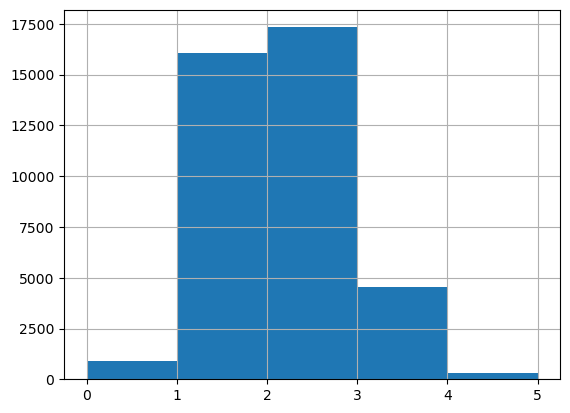

In [16]:
train_obj['neighbourhood_group'].value_counts()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train_obj['neighbourhood_group'])
label_n = le.transform(train_obj['neighbourhood_group'])
print(set(label_n))
print(le.classes_)

train['ngroup_idx'] = label_n

train['ngroup_idx'].value_counts()
train['ngroup_idx'].hist(bins=range(0, 6, 1))



{0, 1, 2, 3, 4}
['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


<AxesSubplot:>

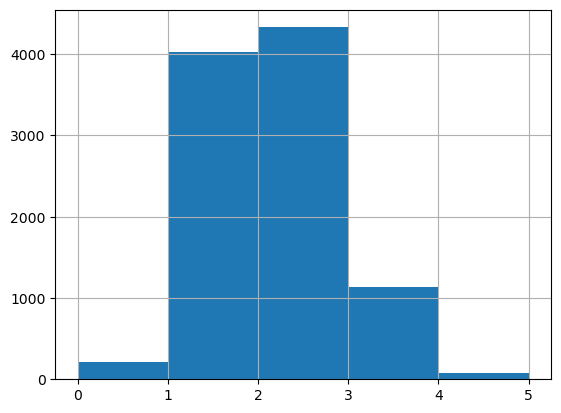

In [17]:
test_obj['neighbourhood_group'].value_counts()

le.fit(test_obj['neighbourhood_group'])
label_n2 = le.transform(test_obj['neighbourhood_group'])
print(set(label_n2))
print(le.classes_)

test['ngroup_idx'] = label_n2

test['ngroup_idx'].value_counts()
test['ngroup_idx'].hist(bins=range(0, 6, 1))


room_type을 인코딩 합니다.

['Private room' 'Entire home/apt' 'Shared room']
[1 0 0 ... 0 0 0]
{0, 1, 2}
['Entire home/apt' 'Private room' 'Shared room']


<AxesSubplot:>

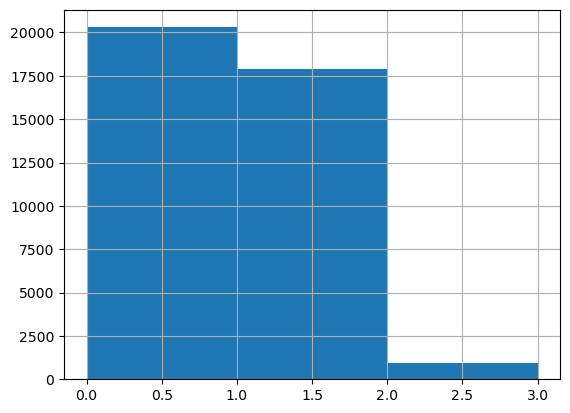

In [18]:
print(train_obj['room_type'].unique())
train_obj['room_type'].value_counts()

label_r = le.fit_transform(train_obj['room_type'])
print(label_r)
print(set(label_r))
print(le.classes_)
train['room_idx'] = label_r
train['room_idx'].value_counts()
train['room_idx'].hist(bins=range(0, 4, 1))

[1 0 0 ... 1 1 1]
{0, 1, 2}


<AxesSubplot:>

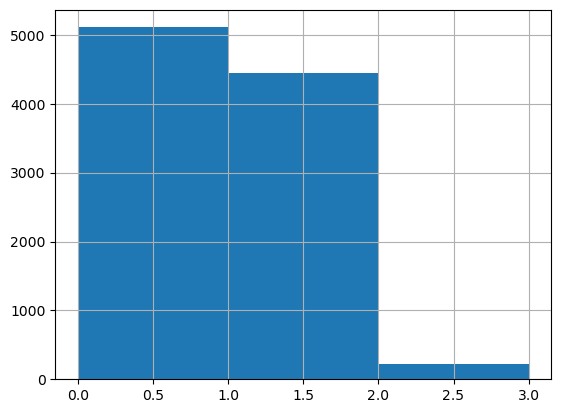

In [19]:
test_obj['room_type'].value_counts()

label_r2 = le.fit_transform(test_obj['room_type'])
print(label_r2)
print(set(label_r2))
test['room_idx'] = label_r2
test['room_idx'].value_counts()
test['room_idx'].hist(bins=range(0, 4, 1))

neighbourhood를 인코딩합니다.

<AxesSubplot:>

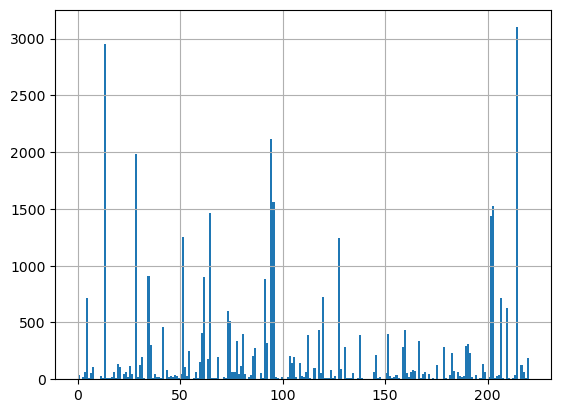

In [20]:
# print(train_obj['neighbourhood'].unique())
train_obj['neighbourhood'].value_counts()

label_h = le.fit_transform(train_obj['neighbourhood'])
# print(le.classes_)
train['nhood_idx'] = label_h
train['nhood_idx'].value_counts()
train['nhood_idx'].hist(bins=range(0, 221, 1))

<AxesSubplot:>

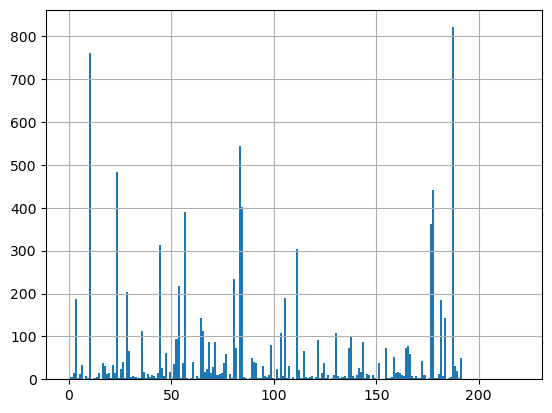

In [21]:
test_obj['neighbourhood'].value_counts()

label_h2 = le.fit_transform(test_obj['neighbourhood'])
# print(label_h2)
# print(set(label_h2))
test['nhood_idx'] = label_h2
test['nhood_idx'].value_counts()
test['nhood_idx'].hist(bins=range(0, 221, 1))

분석에 불필요한 컬럼을 삭제합니다. 레이블 인코딩한 오브젝트형 컬럼도 삭제합니다.

In [22]:
# 불필요한 컬럼 살제 (열을 삭제하는 것이라서 축 옵션 =1)
train = train.drop('name', axis=1)
train = train.drop('host_name', axis=1)
test = test.drop('name', axis=1)
test = test.drop('host_name', axis=1)

train = train.drop('neighbourhood_group', axis=1)
train = train.drop('room_type', axis=1)
test = test.drop('neighbourhood_group', axis=1)
test = test.drop('room_type', axis=1)

train = train.drop('neighbourhood', axis=1) #일단은
test = test.drop('neighbourhood', axis=1)

In [23]:
# last_review 가공
train['last_review'] = train['last_review'].str.replace('-','')
test['last_review'] = test['last_review'].str.replace('-','')
train['last_review'].isnull().sum() #결측값이 존재

train_lastrv = train['last_review'].dropna( axis=0)
test_lastrv = test['last_review'].dropna( axis=0)

28983    20190708
17748    20190708
9394     20190708
Name: last_review, dtype: int32
4796     20110918
16851    20110425
5352     20110328
Name: last_review, dtype: int32
20190519.0
20190518.0


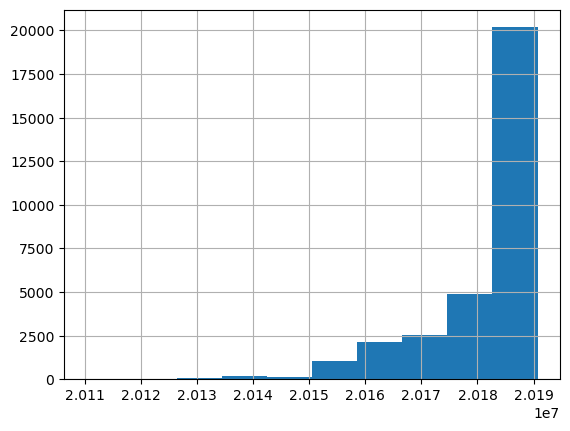

In [24]:
test_lastrv = test_lastrv.astype(int)
train_lastrv = train_lastrv.astype(int)
print('==============================================================')
print(train_lastrv.sort_values(ascending= False).head(3))

print('==============================================================')
print(train_lastrv.sort_values(ascending= False).tail(3))
print('==============================================================')
train_lastrv.describe() # 평균적으로 2018년부터 2019년 사이 최근 리뷰가 달렸다.
train_lastrv.hist()
print(train_lastrv.median())
print(test_lastrv.median())

train['last_review']  = train_lastrv
test['last_review'] = test_lastrv


많은 곳이 2018년과 2019년 사이에 리뷰가 달렸음을 확인할 수 있습니다.  
최근 리뷰 날짜의 median(중위수)를 이용하여 결측값을 채웁니다.

In [25]:
# 결측치 채우기
train['last_review'] = train['last_review'].fillna(20190519)
test['last_review'] = test['last_review'].fillna(20190519)

reviews_per_month 는 평균값 1.25으로 채워 넣어도 무방하다고 판단하였습니다.

In [26]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(1.25)
test['reviews_per_month'] = test['reviews_per_month'].fillna(1.25)

In [27]:
# 가공된 데이터의 결측치 확인
train.isnull().sum()
test.isnull().sum()
#테스트 데이터 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   host_id                         9779 non-null   int64  
 2   latitude                        9779 non-null   float64
 3   longitude                       9779 non-null   float64
 4   minimum_nights                  9779 non-null   int64  
 5   number_of_reviews               9779 non-null   int64  
 6   last_review                     9779 non-null   float64
 7   reviews_per_month               9779 non-null   float64
 8   calculated_host_listings_count  9779 non-null   int64  
 9   availability_365                9779 non-null   int64  
 10  ngroup_idx                      9779 non-null   int32  
 11  room_idx                        9779 non-null   int32  
 12  nhood_idx                       97

## 상관계수

어떤 피처들을 비교해야 할지 상관관계를 알아봅니다.

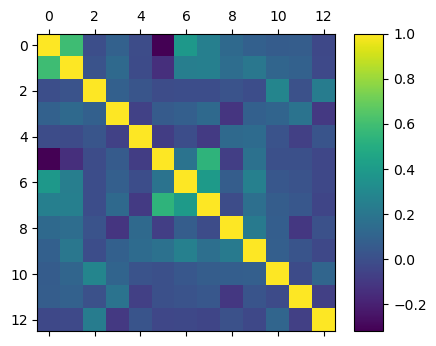

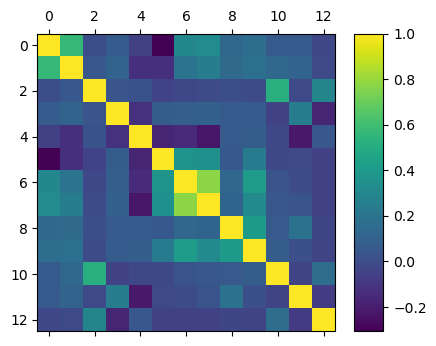

In [28]:
hmap = train.corr(method='pearson')
plt.matshow(hmap)
plt.colorbar(shrink=0.8, aspect=10)

plt.show()

hmap = train.corr(method='spearman')
plt.matshow(hmap)
plt.colorbar(shrink=0.8, aspect=10)

plt.show()

상관계수(correction)이 0에 가까울수록 선형의 상관관계에서 벗어난다고 볼 수 있습니다.

참고 : https://bioinformaticsandme.tistory.com/58(상관계수)

- 가격과 위치/방 종류는 관계가 있을까요?

In [29]:
train['price'] = target
c1 = train[['ngroup_idx','room_idx', 'nhood_idx', 'price']]
c1.corr(method='pearson')

,ngroup_idx,room_idx,nhood_idx,price
ngroup_idx,1.000000,-0.016322,0.110060,0.079997
room_idx,-0.016322,1.000000,-0.070859,-0.609187
nhood_idx,0.110060,-0.070859,1.000000,0.138517
price,0.079997,-0.609187,0.138517,1.000000


In [30]:
# train = train.drop('ngroup_idx', axis=1)
# test = test.drop('ngroup_idx', axis=1)


In [31]:
# train = train.drop('id', axis=1)
# test = test.drop('id', axis=1)

# train = train.drop('host_id', axis=1)
# test = test.drop('host_id', axis=1)


In [32]:
train.corr()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ngroup_idx,room_idx,nhood_idx,price
id,1.000000,0.591261,-0.002445,0.092199,-0.011869,-0.319121,0.386203,0.248804,0.132020,0.085416,0.064471,0.070941,-0.033361,-0.018974
host_id,0.591261,1.000000,0.020077,0.129314,-0.016550,-0.141992,0.245195,0.251870,0.152545,0.201772,0.113297,0.092852,-0.026279,-0.019322
latitude,-0.002445,0.020077,1.000000,0.082819,0.026376,-0.010896,-0.007900,-0.005226,0.020802,-0.006414,0.279038,0.007921,0.234582,0.078461
longitude,0.092199,0.129314,0.082819,1.000000,-0.061787,0.059188,0.078375,0.130995,-0.114195,0.087417,0.104786,0.185285,-0.100672,-0.324487
minimum_nights,-0.011869,-0.016550,0.026376,-0.061787,1.000000,-0.078471,-0.007553,-0.095274,0.130441,0.141984,0.017546,-0.071361,0.026080,0.028839
number_of_reviews,-0.319121,-0.141992,-0.010896,0.059188,-0.078471,1.000000,0.185511,0.536678,-0.072237,0.172597,0.003952,0.001982,-0.037886,-0.043135
last_review,0.386203,0.245195,-0.007900,0.078375,-0.007553,0.185511,1.000000,0.402045,0.067600,0.257885,0.037752,0.016178,-0.034955,0.017781
reviews_per_month,0.248804,0.251870,-0.005226,0.130995,-0.095274,0.536678,0.402045,1.000000,-0.011740,0.162710,0.067890,0.037073,-0.044366,-0.039811
calculated_host_listings_count,0.132020,0.152545,0.020802,-0.114195,0.130441,-0.072237,0.067600,-0.011740,1.000000,0.225041,0.073447,-0.105029,0.010346,0.131348
availability_365,0.085416,0.201772,-0.006414,0.087417,0.141984,0.172597,0.257885,0.162710,0.225041,1.000000,0.080003,0.024775,-0.034452,0.098602


In [33]:

train = train.drop('price', axis=1)

In [34]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   host_id                         9779 non-null   int64  
 2   latitude                        9779 non-null   float64
 3   longitude                       9779 non-null   float64
 4   minimum_nights                  9779 non-null   int64  
 5   number_of_reviews               9779 non-null   int64  
 6   last_review                     9779 non-null   float64
 7   reviews_per_month               9779 non-null   float64
 8   calculated_host_listings_count  9779 non-null   int64  
 9   availability_365                9779 non-null   int64  
 10  ngroup_idx                      9779 non-null   int32  
 11  room_idx                        9779 non-null   int32  
 12  nhood_idx                       97

## 스케일링

In [35]:
# 스케일러 선택
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
#스케일링할 피처 선택
cols = [
        'latitude',
        'host_id',        
        'latitude',
        'longitude',
        'minimum_nights',
        'number_of_reviews', 
        'last_review',
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365',
        # 'ngroup_idx',
        # 'room_idx',
        # 'nhood_idx'
        ]

display(train.head(1))
train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])
display(train.head(1))
display(test.head(1))

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ngroup_idx,room_idx,nhood_idx
0,14963583,94219511,40.80167,-73.95781,3,3,20190101.0,0.09,2,0,2,1,94


,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ngroup_idx,room_idx,nhood_idx
0,14963583,0.343458,0.731742,0.539318,0.001601,0.004769,0.992448,0.001368,0.003067,0.0,2,1,94


,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ngroup_idx,room_idx,nhood_idx
0,30913224,0.1231,0.508544,0.560563,0.001601,0.00318,0.997512,0.005129,0.0,0.0,1,1,187


마지막으로 어떤 피처로 모델을 학습해야 할지 정해야겠습니다. price와의 상관계수를 보고 0에 가까운 몇개는 드랍하는 쪽이 오버피팅이 덜 될 것이라고 생각했습니다. 하지만 여러번을 시도한 결과 삭제하는 피처가 없을 때 가장 오차가 적었습니다.


In [36]:
# train = train.drop('minimum_nights', axis=1)
# test = test.drop('minimum_nights', axis=1)

In [37]:

# train = train.drop('last_review', axis=1)
# test = test.drop('last_review', axis=1)

In [38]:
train.head(2)

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,ngroup_idx,room_idx,nhood_idx
0,14963583,0.343458,0.731742,0.539318,0.001601,0.004769,0.992448,0.001368,0.003067,0.000000,2,1,94
1,9458704,0.178671,0.631633,0.478445,0.000801,0.101749,0.999030,0.028552,0.003067,0.717808,2,0,95


## 4. 검증 데이터 split  (train_test_split)

 validation 셋의 비율을 20%정도로 해서 테이터를 나누어 줍니다. 

In [39]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.20 ,random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 13), (7824, 13), (31292,), (7824,))

## 5. 머신러닝

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
# Xgboost
from xgboost import XGBRegressor
model1 = XGBRegressor(learning_rate=0.01,
n_estimators=1000, subsample=0.8, max_depth=10, 
random_state=2022)

model1.fit(X_train, y_train)
pred = model1.predict(X_val)
mean_squared_error(y_val, pred)

0.17291274489290123

In [42]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state=2022,
n_estimators =300, min_samples_split  =10,
min_samples_leaf = 10, max_depth = 15
)

model2.fit(X_train, y_train)
pred = model2.predict(X_val)
mean_squared_error(y_val, pred)

0.18497291004594527

다양한 모델을 적용해가며 가장 정확도가 높은 xgboost를 선택했습니다. 다른 모델은 회귀 항목을 참조해주세요.

In [43]:
from sklearn.ensemble import VotingRegressor

single_models = [
    ('model1', XGBRegressor(learning_rate=0.01,
n_estimators=1000, subsample=0.8, max_depth=10, 
random_state=2022) ),
    ('model2', RandomForestRegressor(random_state=2022,
n_estimators =300, min_samples_split  =10,
min_samples_leaf = 10, max_depth = 15) )
]

voting_regressor = VotingRegressor(single_models, n_jobs=-1)
voting_regressor.fit(X_train,y_train)
VotingRegressor(estimators = [('scaler1', XGBRegressor(learning_rate=0.01,
n_estimators=1000, subsample=0.8, max_depth=10, 
random_state=2022) ),
    ('scaler2', RandomForestRegressor(random_state=2022,
n_estimators =300, min_samples_split  =10,
min_samples_leaf = 10, max_depth = 15) )
])
    
voting_pred = voting_regressor.predict(X_val)

mean_squared_error(y_val, voting_pred)

0.17659713528622176

In [44]:
print(mean_squared_error(y_val, voting_pred))

0.17659713528622176


최적의 하이퍼 파라미터를 위해 그리드서치와 랜덤서치를 시도해 보았습니다. 그리드서치는 시간이 너무 오래 걸려 효율적이지 못하다고 판단했습니다. 랜덤서치의 패러미터들이 선택할 수 있는 수치의 범위를 점점 좁혀가며 그 중에 가장 성능이 좋았던 수치를 선택했습니다.

In [45]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#     'n_estimators': [10, 100, 300, 500], 
#     # 'learning_rate': [0.02, 0.01, 0.005], 
#     'max_depth': [8,12,15],
#     'min_samples_split' : [10, 30, 50],
#     'min_samples_leaf' : [10, 30, 40]
#     # 'subsample': [0.5, 0.7, 0.9],
# }
# clf = RandomizedSearchCV(model, params, random_state=2022, cv=4, n_iter=25, scoring='neg_mean_squared_error')
# clf.fit(X_train, y_train)

## 6. 데이터 예측과 평가

In [46]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('~/aiffel/Exploration/E02/data/y_test.csv')
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   9779 non-null   int64
dtypes: int64(1)
memory usage: 76.5 KB


In [47]:
pred = model1.predict(test)

In [48]:
pred = np.expm1(pred) # 로그 씌웠던거 원상복귀

In [49]:
mean_squared_error(y_test, pred)

43278.155817339546

In [51]:
voting_pred = voting_regressor.predict(test)
voting_pred = np.expm1(voting_pred)
mean_squared_error(y_test, voting_pred)

44651.26881127601

xgboost, 앙상블모델로 예측해 본 결과 xgboost 모델 (model1)이 성능이 더 좋아 채택했습니다.

------------------  
 ### *<center>결과 : MSE : 43287.155817339546</center>*  
-------------------  

## 7. 회고

- **차원 축소**  
데이터를 전처리와 하는 데 있어 너무 많은 피처를 이용하지는 않았는지 고려해 보았습니다. 하지만 상관계수가 낮은 피처 한두개를 삭제하자 오차가 커졌습니다.
corr(), 하이퍼 파라미터 설정, 모델 앙상블로 오차를 줄이려고 해보았습니다. 최적화가 덜 된 탓인지 앙상블할 모델을 잘못 선택했는지 결과가 크게 다르지 않았습니다.


- 다양한 회귀 모델 적용과 모델 앙상블하기

In [ ]:
from sklearn.linear_model import ElasticNet

model3 = ElasticNet(random_state=2022, alpha=0.00003, l1_ratio= 0.2)


model3.fit(X_train, y_train)
pred = model3.predict(X_val)
mean_squared_error(y_val, pred)

In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model4 = Ridge(alpha=0, random_state=2022, solver="cholesky")


model4.fit(X_train, y_train)
pred = model4.predict(X_val)
mean_squared_error(y_val, pred)

In [ ]:
from sklearn.linear_model import Lasso

model5 = Lasso(alpha=0.00001)
model5.fit(X_train, y_train)
pred = model5.predict(X_val)
mean_squared_error(y_val, pred)

- 앙상블에는 보팅, 배깅(bagging), 부스팅(Boosting)이 있습니다.  
저는 보팅방식을 선택해 모델을 조합했습니다.

In [ ]:
from sklearn.ensemble import VotingRegressor

single_models = [
    ('model1', XGBRegressor(learning_rate=0.01,
n_estimators=1000, subsample=0.8, max_depth=10, 
random_state=2022) ),
    ('model2', RandomForestRegressor(random_state=2022,
n_estimators =300, min_samples_split  =10,
min_samples_leaf = 10, max_depth = 15) ),
    ('model3', ElasticNet(random_state=2022, alpha=0.1, l1_ratio= 0.2)),
    ('model4', Ridge(alpha=1, random_state=2022,)),
    ('model5', Lasso(alpha=0.0001))
]

voting_regressor = VotingRegressor(single_models, n_jobs=-1)
voting_regressor.fit(X_train,y_train)
VotingRegressor(estimators = [('scaler1', XGBRegressor(learning_rate=0.01,
n_estimators=1000, subsample=0.8, max_depth=10, 
random_state=2022) ),
    ('scaler2', RandomForestRegressor(random_state=2022,
n_estimators =300, min_samples_split  =10,
min_samples_leaf = 10, max_depth = 15) ),
    ('scaler3', ElasticNet(random_state=2022, alpha=0.1, l1_ratio= 0.2)),
    ('scaler4', Ridge(alpha=1, random_state=2022,)),
    ('scaler5', Lasso(alpha=0.0001))])


In [ ]:
    
voting_pred = voting_regressor.predict(X_val)
voting_pred = np.expm1(voting_pred)
mean_squared_error(y_test, voting_pred)

- 5개정도의 모델을 앙상블하니 성능이 별로였습니다. 차라리 괜찮은 xgboost를 여러개 앙상블할 걸 그랬다는 생각이 들었습니다.  
xgboost가 눈에 띄게 성능이 좋았기 때문입니다.  
하이퍼 파라미터만 다르게 조절한 xgboost모델이나 랜덤포레스트만 선택해서 앙상블을 시도해 보지 못한 것이 아쉽습니다.

In [ ]:
# # from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#     'n_estimators': [10, 100, 300, 500], 
#     # 'learning_rate': [0.02, 0.01, 0.005], 
#     'max_depth': [8,12,15],
#     'min_samples_split' : [10, 30, 50],
#     'min_samples_leaf' : [10, 30, 40]
#     # 'subsample': [0.5, 0.7, 0.9],
# }
# clf = RandomizedSearchCV(model, params, random_state=2022, cv=4, n_iter=25, scoring='neg_mean_squared_error')
# clf.fit(X_train, y_train)

- **범주형 데이터의 인코딩**
데이터에서 유의미한 오브젝트형 컬럼으로 roomtype, neighbourhood, neighbourhood group이 있었습니다.
nunique()나 describe()를 통해 살펴보았습니다. 레이블링은 인덱스 개수에 제한이 없지만 원-핫코딩은 인덱스 개수가 많아질수록 새로 붙는 컬럼의 개수가 너무 많아지므로 roomtype과 neighbourhood group으로만 나누어 보았습니다. 하지만 결과에 크게 도움이 되지 않아 다시 레이블링으로 세 컬럼 다 인코딩했습니다.  
세 지표 중 roomtype은 가격과 상당히 높은 상관관계를 가지고 있었습니다. neighbourhood와 neighbourhood group도 분명 어떤 관계를 가지고 있는 것을 3d 산점도, corr()으로 확인할 수 있었지만 레이블이 0부터 221까지 있는데 가장 많은 그룹부터 소팅을 하고 붙여야 숫자의 크기와 가격이 좀 더 관계가 있어지지 않을까 해서 value_counts()로 정렬을 해서 레이블링도 해 보았습니다.  
그런데 오히려 결과 MSE 가 증가하게 되어서 데이터란 반드시 넘겨짚거나 직관적으로 관계를 이해하지 말고 데이터적으로 분석을 해야한다는 것을 다시 느꼈습니다.  

- **스케일러 선택**
민맥스와 스탠다드 스케일러를 각각 적용해 보았습니다. 데이터의 분포 (히스토그램 등으로 알아본 대강의 형태)에 따라 어떤 스케일러가 더 효과적일 지 생각해 보았습니다. 가격, 최근리뷰나 네이버 등이 평균에 굉장히 몰려있는 종모양을 하고 있어서 로그를 씌우거나 정규분포를 확인하는 것이 더 효과적이라고 생각을 해서 스탠다드 스케일을 적용했습니다. 만약 좀 더 넓은 범위에, 평균 가까이 굉장히 몰려있지는 않은 모양의 데이터였다면 민맥스를 적용했을 것 같습니다.

- 로그 처리를 했으면 평가할 때 다시 돌려줘야 합니다. 처음에 가격에 로그함수를 씌워 예측을 했는데 다시 역함수로 돌려주지 않아서 결과가 매우 높은 값이 나왔습니다.

- 하이퍼 파라미터를 이리저리 조정해봤는데 일단 그리드서치는 너무 느렸습니다.
랜덤서치로 파라미터간 간격을 점점 좁혀가며 몇번 시도해보았습니다.
파라미터 조절으로 결과 MSE값이 43000정도까지는 낮아질 수 있었지만 어느 순간 다시 높아졌습니다.  
적절한 범위를 찾고 나서부터는 미세하게 수동으로 조정하는 것도 하나의 방법이라고 느꼈습니다.

- 하이퍼 파라미터로 더 오차를 낮추지 못했기 때문에 다시 모델 조정과, 피처 선택으로 돌아갔습니다.
랜덤포레스트와 XGBOOST가 비슷하게 성능이 나오게 되었는데 xgboost에서 결국 더 좋은 결과를 낼 수 있었습니다.  
직접 모델을 만들어 보니 랜덤포레스트는 제가 잘 설정해 주어야 할 하이퍼 파라미터가 굉장히 많고, 섬세하기 때문에  
모델을 쉽게 만드는 데는 Xgboost가 편했습니다.
xgboost가 결과를 내는 방식도 부스팅 방식인데, subsample 이 어느정도는 작아져야 성능이 좋아지는 것을 확인하고 데이터의 특징을 다시 한 번 살피게 되었습니다. 원리를 다시금 생각해보니 하이퍼파라미터를 잘 맞춘 랜덤포레스트가 더 효과적일 수 있겠다고 느꼈습니다.  
EDA를 통해 알게 된 테이터의 모양은, 많은 피처들이 평균쪽에 몰려 있었으며, 몇몇개의 강한 상관관계를 가지는 피처 외에는 대체로 상관계수가 아주 높은 특징을 보이고 있었기 때문입니다.

## 8. References

https://lms.aiffel.io/ (아이펠 학습자료 Fundamentals 26(데이터핸들링2),27(사이킷런), 29(지도학습 회귀))  
https://apple-rbox.tistory.com/6 (xgboost 원리)  
https://builtin.com/machine-learning/ensemble-model (모델 앙상블)  
https://teddylee777.github.io/scikit-learn/scikit-learn-ensemble (모델과 하이퍼패러미터 최적화)  
https://injo.tistory.com/30 (랜덤포레스트 원리)  